In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
c = []
with open('./club_data.txt', 'r') as f:
    data = f.read()
points = data.split('\n')
for p in points:
    a,b = map(int, p.split(' '))
    c.append([a,b])
CITIES = np.array(c, dtype='int32')
INITIAL_CITY = CITIES[0]
CITIES_COUNT = 40
print(CITIES)

[[ 1 39]
 [75 55]
 [ 2  8]
 [45 26]
 [46 10]
 [49 90]
 [70 65]
 [ 1  2]
 [71 81]
 [36 63]
 [62 70]
 [97  2]
 [ 4  4]
 [89 37]
 [66 12]
 [69 84]
 [81 35]
 [42 33]
 [14 78]
 [24 82]
 [97 21]
 [26 79]
 [38 71]
 [75 34]
 [86  1]
 [79 76]
 [24 48]
 [34 83]
 [ 2 43]
 [77 28]
 [36  9]
 [32 61]
 [57 81]
 [59 25]
 [19 20]
 [16 78]
 [30 88]
 [15 52]
 [42 85]
 [95 70]]


A TO B, DISTANCE (496)

In [30]:
soln = [list(CITIES[0])]
with open('./optimal_club.txt', 'r') as f:
    data = f.read()
points = data.split('\n')
lines = points[1:] #skip first line
for p in lines:
    a,b, dist = map(int, p.split(' '))
    soln.append(list(CITIES[b]))
SOLUTION = np.array(soln, dtype='int32')
print(SOLUTION.shape)

(41, 2)


In [31]:
MY_ANS = np.array([[75, 55],
       [70, 65],
       [95, 70],
       [79, 76],
       [71, 81],
       [69, 84],
       [62, 70],
       [57, 81],
       [49, 90],
       [42, 85],
       [34, 83],
       [30, 88],
       [24, 82],
       [14, 78],
       [16, 78],
       [26, 79],
       [38, 71],
       [36, 63],
       [32, 61],
       [24, 48],
       [15, 52],
       [ 2, 43],
       [ 1, 39],
       [ 2,  8],
       [ 1,  2],
       [ 4,  4],
       [19, 20],
       [42, 33],
       [45, 26],
       [36,  9],
       [46, 10],
       [59, 25],
       [66, 12],
       [86,  1],
       [97,  2],
       [97, 21],
       [89, 37],
       [81, 35],
       [77, 28],
       [75, 34],
       [75, 55]])
print(MY_ANS.shape)

(41, 2)


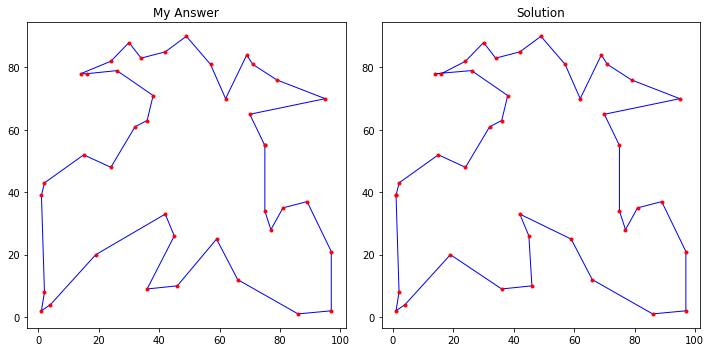

In [32]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,5))
ax1.plot(MY_ANS[:, 0], MY_ANS[:, 1], marker='o', color='b', mfc='r',mec='r', ms=3, linewidth=1)
#ax1.plot(INITIAL_CITY[0], INITIAL_CITY[1], marker='.', mew=3, ms=5, linewidth=0, color='green')
ax1.set(title='My Answer')

ax2.plot(SOLUTION[:, 0], SOLUTION[:, 1], marker='o', color='b', mfc='r',mec='r', ms=3, linewidth=1)
#ax2.plot(INITIAL_CITY[0], INITIAL_CITY[1], marker='.', mew=3, ms=5, linewidth=0, color='green')
ax2.set(title=f'Solution')

fig.tight_layout()
plt.show()

In [34]:
mine,soln = Route(MY_ANS), Route(SOLUTION)
print(mine.f)
print(soln.f)

508.288965811926
498.0180906363851


In [33]:
class Route:
    def __init__(self, path=None):
        if path is not None:
            self.path = path #numpy int array of shape (CITIES_COUNT,2)
        else:
            p = CITIES.copy()
            np.random.shuffle(p)
            self.path = p 
        self.f = self.fitness() #float scalar 
        
    def fitness(self):
        shifted = np.append(self.path[1:], self.path[:1], axis=0)
        squared_comp = np.square((np.subtract(self.path,shifted)))
        out = np.sum(np.sqrt(np.sum(squared_comp,axis=1)))
        return out
            
    def __str__(self):
        return f"Route: {self.path}; Fitness: {self.f:.5f}"
    
    def __repr__(self):
        return f"Route at {hex(id(self))}"  #; Fitness: {self.f:.5f}"  